2.3 Implémentations numériques dans le cas discret pour n < m
=========================================

Il est nécessaire, pour faire tourner cette sous-section et la suivante, d'installer le module d'optimisation convexe cvxpy comme décrit sur le lien https://www.cvxpy.org/install/index.html#install-from-source. 

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import numpy.random as rnd
import scipy.stats as sts
import cvxpy as cp

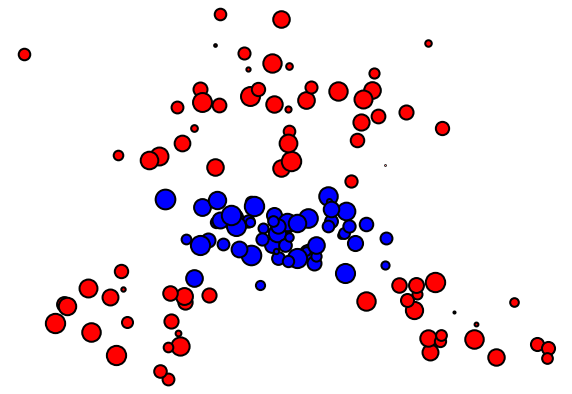

In [6]:
n = 60 # Nombre de points (x_i)
m = 80 # Nombre de points (y_j)
# On génère les nuages de points X=(x_i)_i et Y=(y_j)_j.
gauss = lambda q,a,c: a*np.random.randn(2, q) + np.transpose(np.tile(c, (q,1)))
X = np.random.randn(2,n)*.3
Y = np.hstack((gauss(int(m/2),.5,[0,1.6]),np.hstack((gauss(int(m/4),.3,[-1,-1]),gauss(int(m/4),.3,[1,-1])))))
# On génère les poids a et b
normalize = lambda a: a/np.sum(a)
a = normalize(np.random.rand(n, 1))
b = normalize(np.random.rand(m, 1))
# On affiche les nuages de points avec respectivement la couleur bleu et la couleur rouge pour X et Y
myplot = lambda x,y,ms,col: plt.scatter(x,y, s=ms*20, edgecolors="k", c=col, linewidths=2)
plt.figure(figsize = (10,7))
plt.axis("off")
for i in range(len(a)):
    myplot(X[0,i], X[1,i], a[i]*len(a)*10, 'b')
for j in range(len(b)):
    myplot(Y[0,j], Y[1,j], b[j]*len(b)*10, 'r')
plt.xlim(np.min(Y[0,:])-.1,np.max(Y[0,:])+.1)
plt.ylim(np.min(Y[1,:])-.1,np.max(Y[1,:])+.1)
plt.show()

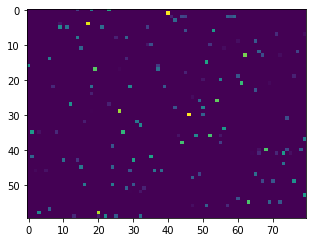

In [12]:
# On définit la matrice de coût
def distmat(x,y):
    return np.sum(x**2,0)[:,None] + np.sum(y**2,0)[None,:] - 2*x.transpose().dot(y)
C = distmat(X,Y)
# On définit la variable P 
P = cp.Variable((n,m))
# On définit U(a,b) selon la première remarque en section 2.2
u = np.ones((m,1))
v = np.ones((n,1))
U = [0 <= P, cp.matmul(P,u)==a, cp.matmul(P.T,v)==b]
# On résout le problème de transport
objective = cp.Minimize( cp.sum(cp.multiply(P,C)) )
prob = cp.Problem(objective, U)
result = prob.solve()
# On affiche la matrice solution
plt.figure(figsize = (5,5))
plt.imshow(P.value);

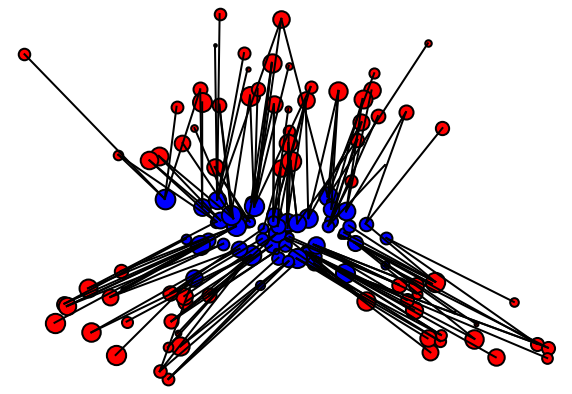

In [13]:
# On affiche les connections définit par la solution optimale
I,J = np.nonzero(P.value>1e-5)
plt.figure(figsize = (10,7))
plt.axis('off')
for k in range(len(I)):
    h = plt.plot(np.hstack((X[0,I[k]],Y[0,J[k]])),np.hstack(([X[1,I[k]], Y[1,J[k]]])),'k', lw = 2)
for i in range(len(a)):
    myplot(X[0,i], X[1,i], a[i]*len(a)*10, 'b')
for j in range(len(b)):
    myplot(Y[0,j], Y[1,j], b[j]*len(b)*10, 'r')
plt.xlim(np.min(Y[0,:])-.1,np.max(Y[0,:])+.1)
plt.ylim(np.min(Y[1,:])-.1,np.max(Y[1,:])+.1)
plt.show()

2.4 Implémentations numériques dans le cas discret pour n = m
-------------------

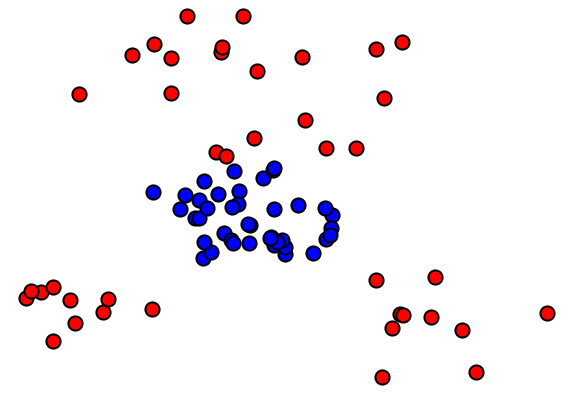

In [27]:
n = 40 # Nombre de points (x_i)
m = n  # Nombre de points (y_j)
# On génère les nuages de points X=(x_i)_i et Y=(y_j)_j.
X = np.random.randn(2,n)*.3
Y = np.hstack((gauss(int(m/2),.5,[0,1.6]),np.hstack((gauss(int(m/4),.3,[-1,-1]),gauss(int(m/4),.3,[1,-1])))))
# On génère les poids a et b
a = np.ones([n,1])/n
b = a
# On définit la matrice de coût
C = distmat(X,Y)
# On affiche les nuages de points avec respectivement la couleur bleu et la couleur rouge pour X et Y
plt.figure(figsize = (10,7))
plt.axis('off')
myplot(X[0,:],X[1,:],10,'b')
myplot(Y[0,:],Y[1,:],10,'r')
plt.xlim(np.min(Y[0,:])-.1,np.max(Y[0,:])+.1)
plt.ylim(np.min(Y[1,:])-.1,np.max(Y[1,:])+.1)
plt.show()

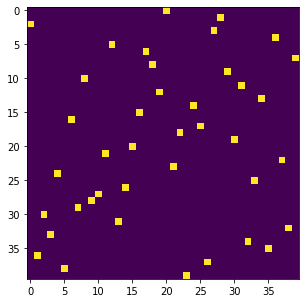

In [29]:
# On définit la variable P 
P = cp.Variable((n,m))
# On définit U(a,b) selon la première remarque en section 2.2
u = np.ones((m,1))
v = np.ones((n,1))
U = [0 <= P, cp.matmul(P,u)==a, cp.matmul(P.T,v)==b]
# On résout le problème de transport
objective = cp.Minimize( cp.sum(cp.multiply(P,C)) )
prob = cp.Problem(objective, U)
result = prob.solve()
# On affiche la matrice solution
plt.figure(figsize = (5,5))
plt.imshow(P.value);

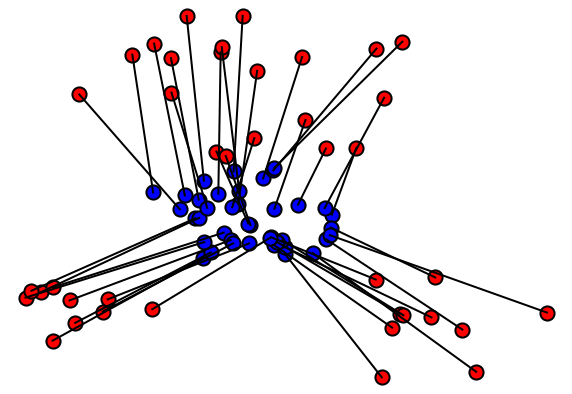

In [30]:
# On affiche les connections définit par la solution optimale
I,J = np.nonzero(P.value>1e-5)
plt.figure(figsize = (10,7))
plt.axis('off')
for k in range(len(I)):
    h = plt.plot(np.hstack((X[0,I[k]],Y[0,J[k]])),np.hstack(([X[1,I[k]], Y[1,J[k]]])),'k', lw = 2)
myplot(X[0,:], X[1,:], 10, 'b')
myplot(Y[0,:], Y[1,:], 10, 'r')
plt.xlim(np.min(Y[0,:])-.1,np.max(Y[0,:])+.1)
plt.ylim(np.min(Y[1,:])-.1,np.max(Y[1,:])+.1)
plt.show()

4.4 Un algorithme de calculs numériques 
-------------------



On effectue un premier tracé pour : $$ f(x) = log(x), \phi(y, z) = 10^{-1}|y - z|^2, c = (x - y)^2 \text{ et }
   V(y) = 10|y - 0.7|^2. $$
   


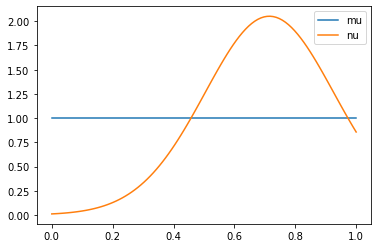

In [51]:
def V(y):
    return 10 * np.abs(y - 0.7)**2

def phi(y, z):
    return 10**(-1) * np.abs(y - z)**2

def c(x, y):
    return (x - y)**2

def d_c(x, y):
    return 2 * (x - y)


N = 100 # nombre de points
n = 10  # nombre d'itérations
y = np.linspace(0, 1, N)

mu = 1 / N * np.ones(N)
nu = 1 / N * np.ones(N)

for _ in range(n):
    S = np.cumsum(nu)
    term1 = 1/ N * np.cumsum(d_c(S, y))
    term2 = V(y)

    term3 = np.zeros(N)
    for i in range(N):
        yi = y[i] * np.ones(N)
        term3[i] = 1 / N * np.dot(phi(yi, y), nu)

    nu = np.exp(- term1 - term2 - term3)
    # On normalise nu
    nu = nu / np.sum(nu)




# On affiche le tracé
plt.plot(y, mu * N, label="mu")
plt.plot(y, nu * N, label="nu")
plt.legend()
plt.show()


On effectue un second tracé pour : $$ f(x) = log(x), \phi(y, z) = 10^3|y - z|^2, c = (x - y)^2 \text{ et }
   V(y) = 10^2|y - 0.4|^2. $$

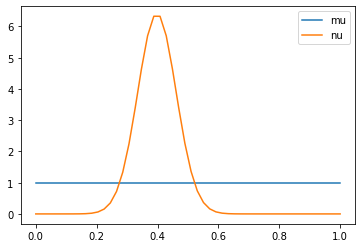

In [44]:
def V(y):
    return 100 * np.abs(y - 0.4)**2

def phi(y, z):
    return 10**3 * np.abs(y - z)**2

def c(x, y):
    return (x - y)**2

def d_c(x, y):
    return 2 * (x - y)


N = 50 # nombre de points
n = 10 # nombre d'itérations
y = np.linspace(0, 1, N)

mu = 1 / N * np.ones(N)
nu = 1 / N * np.ones(N)

for _ in range(n):
    S = np.cumsum(nu)
    term1 = 1/ N * np.cumsum(d_c(S, y))
    term2 = V(y)

    term3 = np.zeros(N)
    for i in range(N):
        yi = y[i] * np.ones(N)
        term3[i] = 1 / N * np.dot(phi(yi, y), nu)

    nu = np.exp(- term1 - term2 - term3)
    # on normalise nu
    nu = nu / np.sum(nu)


# On affiche le tracé
plt.plot(y, mu * N, label="mu")
plt.plot(y, nu * N, label="nu")
plt.legend()
plt.show()

On effectue un troisième tracé pour : $$ f(x) = x^p, \phi(y, z) = 10|y - z|^2, c = (x - y)^2 \text{ et }
   V(y) = 10|y - 0.6|^2. $$

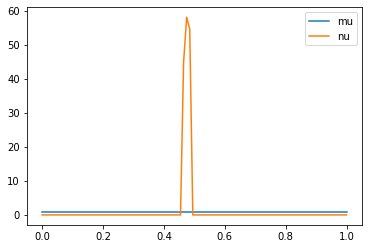

In [45]:
def V(y):
    return 10 * np.abs(y - 0.6)**2

def phi(y, z):
    return 10 * np.abs(y - z)**2

def c(x, y):
    return (x - y)**2

def d_c(x, y):
    return 2 * (x - y)

p = 8
N = 100 # nombre de points
n = 5   # nombre d'itérations
y = np.linspace(0, 1, N)
mu = 1 / N * np.ones(N)
nu = 1 / N * np.ones(N)
iterations = 50

for _ in range(n):
    S = np.cumsum(nu)
    term1 = 1/ N * np.cumsum(d_c(S, y))
    term2 = V(y)
    term3 = np.zeros(N)
    for i in range(N):
        yi = y[i] * np.ones(N)
        term3[i] = 1 / N * np.dot(phi(yi, y), nu)
    left = 0
    right = np.max(term1 + term2 + term3) + 1
    for _ in range(iterations):
        c = (left + right) / 2
        nu = (np.maximum(0, c - term1 - term2 - term3)) ** (1 / p) 
        # on normalise nu
        if np.sum(nu) > 1:
            right = c
        else:
            left = c
    

# On affiche le tracé
plt.plot(y, mu * N, label="mu")
plt.plot(y, nu * N, label="nu")
plt.legend()
plt.show()

5.2.2 Discrétisation du cas continu
-------------------




In [46]:
N = 100 
eps=10**(-8)

On effectue un premier tracé pour : $$ c(x,y) = \frac{1}{2}(x - y)^2,
   V(y) = \frac{1}{2}(y - 0.5)^2, \Phi_{i,j}=(x_i-y_j)^2 $$

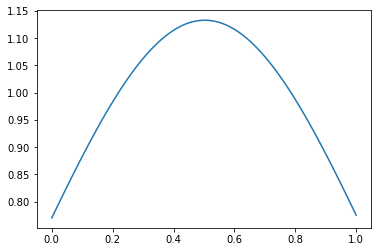

In [47]:
X = np.array([i/N for i in range(N+1)])
Y = np.array([i/N for i in range(N+1)])
nu_temp = np.zeros(N+1)
nu_k = np.ones(N+1)/(N+1)
psi_k = np.zeros(N+1)
phi = np.array([[(i/N - j/N)**2 for j in range(N+1)]for i in range(N+1)])

def c(x,y):
    return 0.5 * (x - y)**2
def V(y):
    return 0.5 * (y - 0.5)**2

F_nu_k = np.array([np.sum([nu_k[l] for l in range(i)]) for i in range(N+1)])
while (np.linalg.norm(nu_k - nu_temp) > eps) :
    nu_temp = np.copy(nu_k)
    for i in range(N+1):
        psi_k[i] = np.sum([F_nu_k[j] - Y[j] for j in range(i)]) /(N+1)
    for i in range(N+1):
        nu_k[i] = np.exp(-psi_k[i] - V(Y[i]) - np.sum([phi[i][j] * nu_temp[j] for j in range(N+1)]))

    # on normalise
    ck1 = np.sum(nu_k)
    nu_k = nu_k / ck1
    F_nu_k = np.array([np.sum([nu_k[l] for l in range(i)]) for i in range(N+1)])

# On affiche le tracé
plt.plot(X,nu_k*(N+1))


On effectue un second tracé pour : $$ c(x,y) = \frac{1}{2}(x - y)^2,
   V(y) = \frac{1}{2}(y - 0.2)^2, \Phi_{i,j}=(x_i-y_j)^2 $$

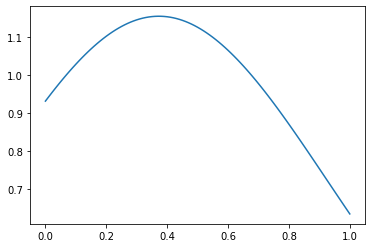

In [52]:
X = np.array([i/N for i in range(N+1)])
Y = np.array([i/N for i in range(N+1)])
nu_temp = np.zeros(N+1)
nu_k = np.ones(N+1)/(N+1)
psi_k = np.zeros(N+1)
phi = np.array([[(i/N - j/N)**2 for j in range(N+1)]for i in range(N+1)])

def c(x,y):
    return 0.5 * (x - y)**2
def V(y):
    return 0.5 * (y - 0.2)**2

F_nu_k = np.array([np.sum([nu_k[l] for l in range(i)]) for i in range(N+1)])
while (np.linalg.norm(nu_k - nu_temp) > eps) :
    nu_temp = np.copy(nu_k)
    for i in range(N+1):
        psi_k[i] = np.sum([F_nu_k[j] - Y[j] for j in range(i)]) /(N+1)
    for i in range(N+1):
        nu_k[i] = np.exp(-psi_k[i] - V(Y[i]) - np.sum([phi[i][j] * nu_temp[j] for j in range(N+1)]))

    # on normalise
    ck1 = np.sum(nu_k)
    nu_k = nu_k / ck1
    F_nu_k = np.array([np.sum([nu_k[l] for l in range(i)]) for i in range(N+1)])

# On affiche le tracé
plt.plot(X,nu_k*(N+1))

On effectue un troisième tracé pour : $$ c(x,y) = \frac{1}{2}(x - y)^2,
   V(y) = \frac{1}{2}|y - 0.5|, \Phi_{i,j}=(x_i-y_j)^2 $$

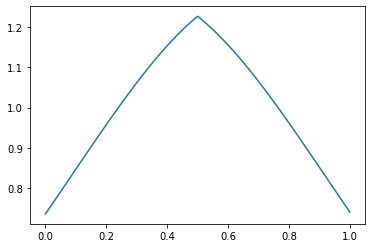

In [53]:
X = np.array([i/N for i in range(N+1)])
Y = np.array([i/N for i in range(N+1)])
nu_temp = np.zeros(N+1)
nu_k = np.ones(N+1)/(N+1)
psi_k = np.zeros(N+1)
phi = np.array([[(i/N - j/N)**2 for j in range(N+1)]for i in range(N+1)])

def c(x,y):
    return 0.5 * (x - y)**2
def V(y):
    return 0.5 * abs(y - 0.5)

F_nu_k = np.array([np.sum([nu_k[l] for l in range(i)]) for i in range(N+1)])
while (np.linalg.norm(nu_k - nu_temp) > eps) :
    nu_temp = np.copy(nu_k)
    for i in range(N+1):
        psi_k[i] = np.sum([F_nu_k[j] - Y[j] for j in range(i)]) /(N+1)
    for i in range(N+1):
        nu_k[i] = np.exp(-psi_k[i] - V(Y[i]) - np.sum([phi[i][j] * nu_temp[j] for j in range(N+1)]))

    # on normalise
    ck1 = np.sum(nu_k)
    nu_k = nu_k / ck1
    F_nu_k = np.array([np.sum([nu_k[l] for l in range(i)]) for i in range(N+1)])

# On affiche le tracé
plt.plot(X,nu_k*(N+1))

On effectue un quatrième tracé pour : $$ c(x,y) = \frac{1}{2}(x - y)^2,
   V(y) = \frac{1}{2}|y - \frac{1}{2}|^2, \Phi_{i,j}=(x_i-y_j)^8 $$

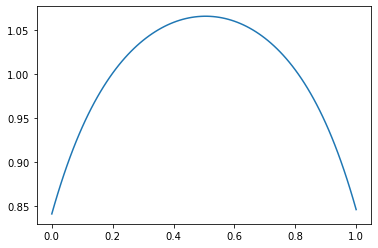

In [50]:
X = np.array([i/N for i in range(N+1)])
Y = np.array([i/N for i in range(N+1)])
nu_temp = np.zeros(N+1)
nu_k = np.ones(N+1)/(N+1)
psi_k = np.zeros(N+1)
phi = np.array([[(i/N - j/N)**8 for j in range(N+1)]for i in range(N+1)])

def c(x,y):
    return 0.5 * (x - y)**2
def V(y):
    return 0.5 * (y - 0.5)**2

F_nu_k = np.array([np.sum([nu_k[l] for l in range(i)]) for i in range(N+1)])
while (np.linalg.norm(nu_k - nu_temp) > eps) :
    nu_temp = np.copy(nu_k)
    for i in range(N+1):
        psi_k[i] = np.sum([F_nu_k[j] - Y[j] for j in range(i)]) /(N+1)
    for i in range(N+1):
        nu_k[i] = np.exp(-psi_k[i] - V(Y[i]) - np.sum([phi[i][j] * nu_temp[j] for j in range(N+1)]))

    # on normalise
    ck1 = np.sum(nu_k)
    nu_k = nu_k / ck1
    F_nu_k = np.array([np.sum([nu_k[l] for l in range(i)]) for i in range(N+1)])

# On affiche le tracé
plt.plot(X,nu_k*(N+1))